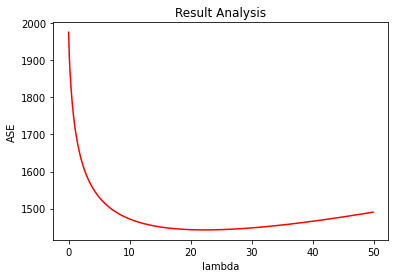

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# load the diabetes dataset
df=pd.read_csv('data.csv')
target_name="Y"
target=df[target_name]
stand = np.std(df)
newdf = (df - df.mean())/np.std(df)
X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y=df[['Y']]

from sklearn.model_selection import train_test_split
import math
lmd=np.arange(0,50, 0.1)
#print(lmd)
bx = plt.gca()
plt.title('Result Analysis')
plt.xlabel('lambda')
plt.ylabel('ASE')

X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
X=np.array(X)
Y=df['Y']
Y=np.array(Y)

ASEs = []
for lams in lmd:
    sum = 0
    Y_pre = []
    for i in range(38):
        #df2 = df.drop(labels=i, axis=0)
        X_test = X[i].reshape(1,-1)
        
        X1 = np.delete(X, i,axis= 0)
        Y1 = np.delete(Y, i,axis=0)

        ridge2 = linear_model.Ridge(alpha=lams, normalize = False)
        ridge2.fit(X1, Y1)
        y_pre = ridge2.predict(X_test)
        Y_pre.append(y_pre[0])
        sum += math.pow(y_pre[0] - Y[i], 2)
    ASE = sum / 38
    ASEs.append(ASE)

bx.plot(lmd, ASEs, color='red')
plt.show()